In [110]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [94]:
fparams = {'axes.labelsize': 18,
           'axes.titlesize': 18,
           'font.size': 18,
           'legend.fontsize': 16,
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(fparams)

In [95]:
an_full = prepare_data("data_npy/41_dd.npy", 0, 0, chop=False)
lc_full = prepare_data("data_npy/41.npy", 0, 0, chop=False)

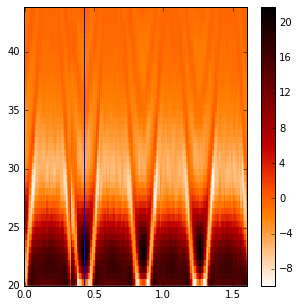

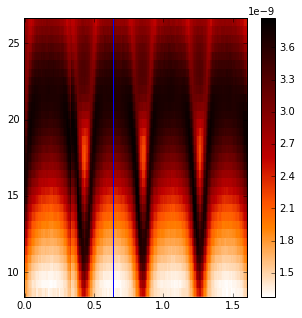

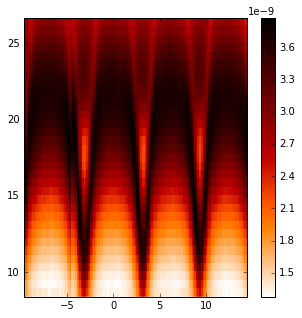

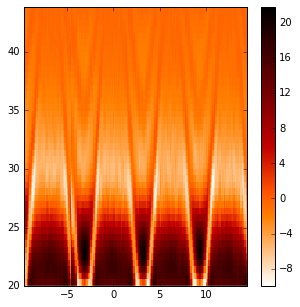

In [3]:
lc = prepare_data("data_npy/41.npy", 7, 40, chop=True)
an = prepare_data("data_npy/41_dd.npy", 7, 50, chop=True)
a, b = calibration_phase_axis(an, lc, 40, 50, 60, 75, plot=True)
plot_datascan(lc)
plot_datascan(an)

In [4]:
an2 = prepare_data("data_npy/41_dd.npy", 22, 45, chop=True)
an2['y'] -= b
an2['y'] /= a
an2['y'] *= 2*np.pi

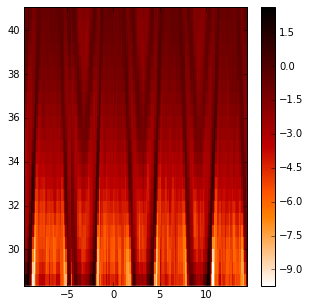

In [5]:
plot_datascan(an2)

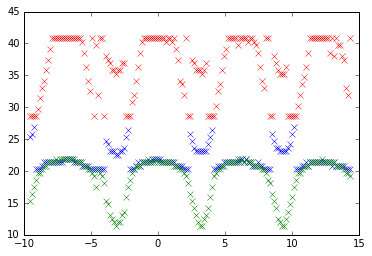

In [6]:
lc_line = peak_positions(lc)
abs_line = peak_positions(an)
abs_line2 = peak_positions(an2)
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(an['y'], abs_line, 'x')
plt.plot(lc['y'], lc_line, 'x')
plt.plot(an2['y'], abs_line2, 'x')

In [7]:
lc_line = zip(lc['y'][34:], lc_line[34:])
abs_line = zip(np.concatenate((an['y'][38:50], an['y'][80:91], an['y'][121:132])),
               np.concatenate((abs_line[38:50], abs_line[80:91], abs_line[121:132])))
abs_line2 = zip(np.concatenate((an2['y'][48:56], an2['y'][73:77], an2['y'][91:98], an2['y'][111:117], an2['y'][134:140])),
               np.concatenate((abs_line2[48:56], abs_line2[73:77], abs_line2[91:98], abs_line2[111:117], abs_line2[134:140])))

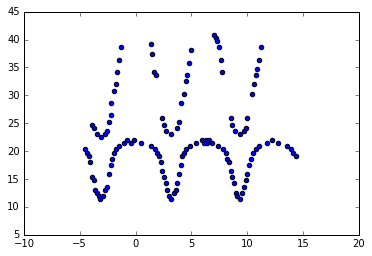

In [8]:
lines = merge_points([lc_line, abs_line, abs_line2])
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Fit with one free parameter

In [9]:
%%capture
p0 = [0.8]
fit_1 = fit_abs_model(lines, 79, p0, Ej=39.8, Ec=5.65, Ea=28.95)

In [10]:
fit_1['popt']

array([ 0.93702294])

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


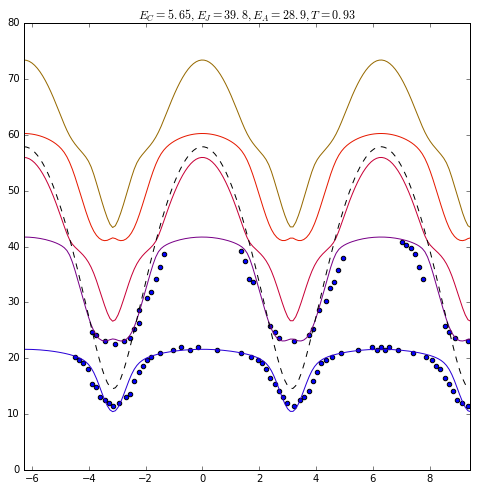

In [11]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, Ea=28.95, flux_final=4*np.pi, n_fluxes=200)

## Fit with two free parameters

In [12]:
%%capture
p0 = [15, 0.87]
fit_2 = fit_abs_model(lines, 79, p0, Ej=39.8, Ec=5.65)

In [13]:
fit_2['popt']

array([ 25.10189301,   0.90567174])

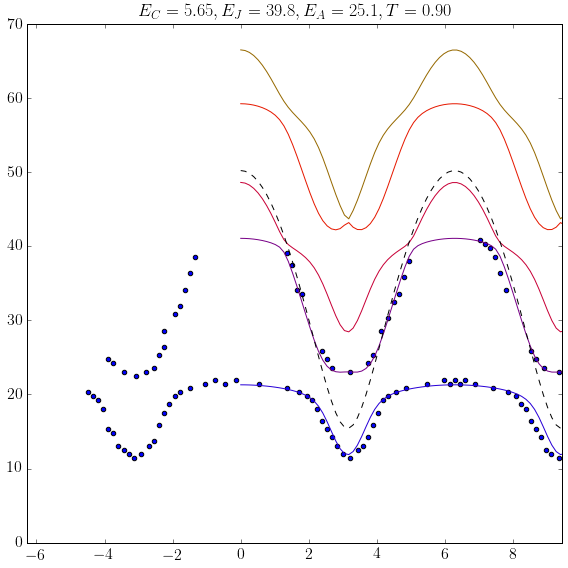

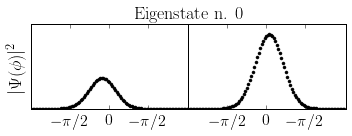

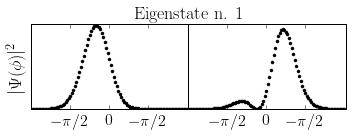

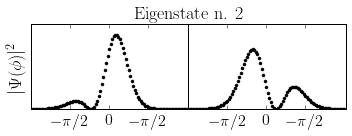

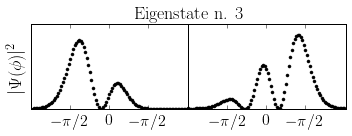

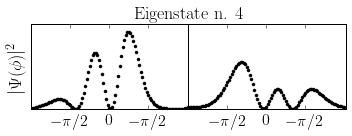

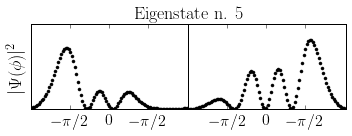

In [217]:
fluxes, freqs, wfs = plot_fit_results(fit_2, lines, Ej=39.8, Ec=5.65, flux_in=0, flux_final=4*np.pi, flux_wf=np.pi)

## Fit with three free parameters

In [ ]:
%%capture
p0 = [5, 27, 0.9]
fit_3 = fit_abs_model(lines, 79, p0, Ej=39.8)

In [16]:
fit_3['popt']

array([  5.52700459,  25.21640004,   0.90507648])

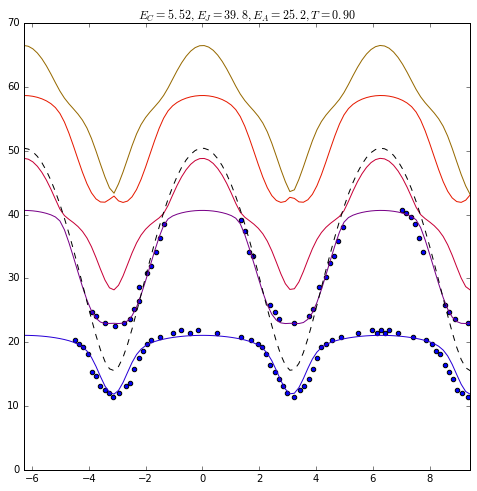

In [17]:
plot_fit_results(fit_3, lines, Ej=39.8)

## Fit with four free parameters

In [18]:
%%capture
p0 = [5, 40, 27, 0.9]
fit_4 = fit_abs_model(lines, 79, p0, max_tol=2e-6)

In [19]:
fit_4['popt']

array([  7.75303073,  29.7022011 ,  26.02648293,   0.90020655])

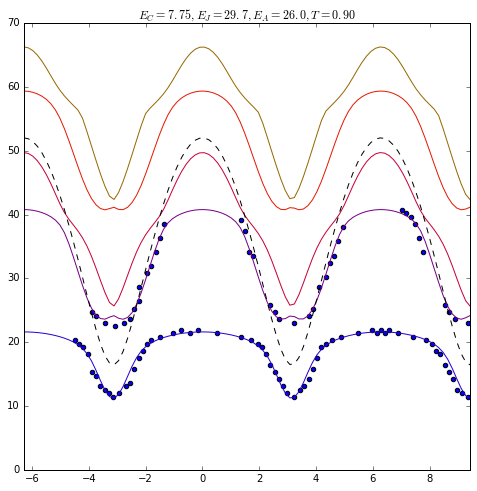

In [20]:
plot_fit_results(fit_4, lines)

## Figure

In [117]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [118]:
an_full = prepare_data("data_npy/41_dd_full.npy", 0, 0, chop=False)
lc_full = prepare_data("data_npy/41.npy", 0, 0, chop=False)
z = an_full['z'].T[::-1]
x = an_full['x']
y = an_full['y']
y -= b
y /= a
y *= 2*np.pi
dx, dy = x[1]-x[0], y[1]-y[0]
ranges = [y[0]-dy/2, y[-1]+dy/2, x[0]-dx/2, x[-1]+dx/2]

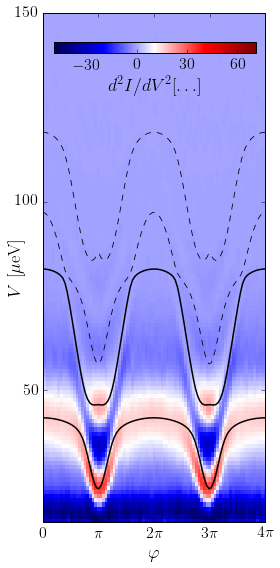

In [226]:
fig, ax = plt.subplots(figsize=(4,8))
im = ax.imshow(z, extent = ranges, aspect='auto', interpolation='none', cmap='seismic')
cbaxes = fig.add_axes([0.2, 0.9, 0.7, 0.02]) 
#cbar = plt.colorbar(cax, orientation='horizontal')
cbar = fig.colorbar(im, cax=cbaxes, orientation='horizontal')
cbaxes.set_xlabel(r'$d^2 I/dV^2 [\dots]$')
cbar.set_ticks([-30, 0, 30, 60])
for f in freqs.T[:2]:
        ax.plot(fluxes, 2*f, c='k', lw=1.5)
ax.plot(fluxes, 2*freqs.T[2], c='k', ls='--', lw=0.8)
ax.plot(fluxes, 2*freqs.T[3], c='k', ls='--', lw=0.8)
ax.set_xlim([0, 4*np.pi])
ax.set_ylim([15, 150])
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
ax.set_yticks([50, 100, 150])
ax.set_xlabel(r'$\varphi$')
ax.set_ylabel(r'$V\,\,[\mu$eV]', labelpad=-10)
#ax.set_yticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.savefig("figures/fit_dev_45.pdf")

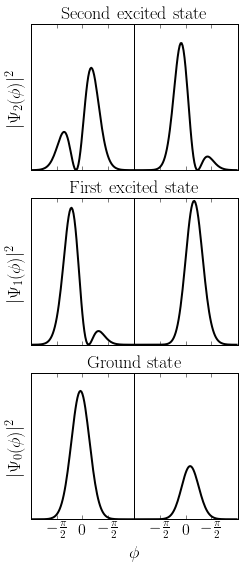

In [228]:
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(3, sharex=True, figsize=(3.5,8))
L = len(wfs[0])

ax[0].plot(np.abs(wfs[2][::-1])**2, c='k', lw=2)
ax[0].set_xlim(0, L)
ax[0].axvline(L/2, c='k')
ax[0].set_ylabel(r'$|\Psi_2(\phi)|^2$')
ax[0].set_xticks([L/8, L/4, 3*L/8, 5*L/8, 3*L/4, 7*L/8])
ax[0].set_yticks([])
ax[0].set_title('Second excited state')
#ax[0].set_title(r'Eigenstate n. %s' % n)

ax[1].plot(np.abs(wfs[1][::-1])**2,  c='k', lw=2)
ax[1].set_xlim(0, L)
ax[1].axvline(L/2, c='k')
ax[1].set_ylabel(r'$|\Psi_1(\phi)|^2$')
ax[1].set_xticks([L/8, L/4, 3*L/8, 5*L/8, 3*L/4, 7*L/8])
#ax[1].set_xticklabels([r'$-\pi/2$', r'$0$', r'$-\pi/2$', r'$-\pi/2$', r'$0$', r'$-\pi/2$'])
ax[1].set_title('First excited state')
ax[1].set_yticks([])

ax[2].plot(np.abs(wfs[0][::-1])**2, c='k', lw=2)
ax[2].set_xlim(0, L)
ax[2].axvline(L/2, c='k')
ax[2].set_ylabel(r'$|\Psi_0(\phi)|^2$')
ax[2].set_xlabel(r'$\phi$')
ax[2].set_xticks([L/8, L/4, 3*L/8, 5*L/8, 3*L/4, 7*L/8])
ax[2].set_xticklabels([r'$-\frac{\pi}{2}$', r'$0$', r'$-\frac{\pi}{2}$',
                       r'$-\frac{\pi}{2}$', r'$0$', r'$-\frac{\pi}{2}$'])
ax[2].set_title('Ground state')
ax[2].set_yticks([])
plt.savefig("figures/wavefunction_dev_45.pdf")